<a href="https://colab.research.google.com/github/MaximLom/global_sales_analysis/blob/main/13_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Опис проєкту:

**У датасеті міститься інформація щодо продажів продукції компанії, яка працює на світовому ринку і продає товари у звичайних магазинах та інтернет-магазинах. Датасет складається з трьох таблиць:**

**events.csv** — продажі за декілька років;  
**products.csv** — категорії товарів та їх коди;  
**countries.csv** — країни, регіони та їх коди.  

**Основна мета — очищення даних та проведення їх аналізу; знаходження цінних інсайтів діяльності компанії.**

#**Data overview** & **Data cleaning**

Завантажуємо датасет, розбираємось зі змістом колонок, зробимо їх опис.
Виявимо ключові поля, що поєднують три таблиці.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

countries = pd.read_csv(f"/content/drive/MyDrive/Google_Colab/13. Final project/countries.csv")
events = pd.read_csv(f"/content/drive/MyDrive/Google_Colab/13. Final project/events.csv")
products = pd.read_csv(f"/content/drive/MyDrive/Google_Colab/13. Final project/products.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Таблиця №1 countries

In [ ]:
# Огляд таблиці "countries" для швидкого перегляду змісту таблиці та назв колонок
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# Під час огляду відмічаємо що необхіна заміна назв стовпців до прикладу з 'sub-region' на 'sub_region'
countries.columns = countries.columns.str.replace("-", "_")

# Також змінимо назву стовпця за яким у подальшому будемо об'єднувати
countries = countries.rename(columns={"alpha_3": "country_code"})

#Інформація про таблицю: кількість пропущених значень, тип даних, назви колонок та інш.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          249 non-null    object
 1   alpha_2       248 non-null    object
 2   country_code  249 non-null    object
 3   region        248 non-null    object
 4   sub_region    248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
# Відзначаємо пропущені значення. Обчислюємо відсоток пропущених значень в таблиці "countries"
missing_data_percent = countries.isna().sum() / countries.shape[0] * 100
count_with_missing = countries.isna().sum()
print(missing_data_percent, count_with_missing)

name            0.000000
alpha_2         0.401606
country_code    0.000000
region          0.401606
sub_region      0.401606
dtype: float64 name            0
alpha_2         1
country_code    0
region          1
sub_region      1
dtype: int64


In [ ]:
# Ми бачимо що кількість пропущених даних дуже незначна та приймаємо рішення видалити їх з таблиці.
countries_clean = countries.dropna()
countries_clean.isna().sum()

,0
name,0
alpha_2,0
country_code,0
region,0
sub_region,0


In [ ]:
#Статистичні показники
countries_clean.describe()

,name,alpha_2,country_code,region,sub_region
count,247,247,247,247,247
unique,247,247,247,5,17
top,Afghanistan,AF,AFG,Africa,Latin America and the Caribbean
freq,1,1,1,59,52


# Таблиця №2 events

In [ ]:
# Огляд таблиці "events" для швидкого перегляду змісту таблиці та назв колонок
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
#Під час огляду відмічаємо що необхіна заміна назв стовпців до прикладу з 'sub region' на 'sub_region'. Для зручності прибираємо пробіли.
events.columns = events.columns.str.replace(" ", "_")

#Приведемо до єдиного регістру
events.columns = events.columns.str.lower()

events["sales_channel"] = events["sales_channel"].str.lower()
events.head(3)


,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,online,4693.0,668.27,502.54


In [ ]:
#Інформація про таблицю: кількість пропущених значень, тип даних, назви колонок та інш.
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


1. Відзначаємо необхідність зміни типу даних в колонках Order Date	Ship Date  
2. Стовпець Country Code має 82 відсутні значення.  
3. Стовпець Units Sold має 2 відсутні значення.

In [ ]:
# Змінимо тип даних для двох колонок "Order Date"	"Ship Date" в DateTime
events['order_date'] = pd.to_datetime(events['order_date'])
events['ship_date'] = pd.to_datetime(events['ship_date'])

In [ ]:
# Працюємо з відсутніми значеннями. Виведемо відсутні значення в відсотковому вигляді для кращого розуміння проблематики.
missing_events_percent = events.isna().sum() / events.shape[0] * 100
missing_events_percent

,0
order_id,0.000000
order_date,0.000000
ship_date,0.000000
order_priority,0.000000
country_code,6.165414
product_id,0.000000
sales_channel,0.000000
units_sold,0.150376
unit_price,0.000000
unit_cost,0.000000


In [ ]:
# Заповнимо 2 пропущені значення в "units_sold" медіаною
events["units_sold"] =  events["units_sold"].fillna(events["units_sold"].median())
events["units_sold"].isnull().sum()

np.int64(0)

In [ ]:
# Заповнимо 82 пропущених значення в клонці "country_code" значенням-плейсхолдером "Unknown".
events["country_code"] = events["country_code"].fillna("Unknown")
events["country_code"].isnull().sum()

np.int64(0)

# Таблиця №3 products

In [ ]:
# Огляд таблиці "events" для швидкого перегляду змісту таблиці та назв колонок
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
#Інформація про таблицю: кількість пропущених значень, тип даних, назви колонок та інш.
#Приведемо до єдиного регістру
products.columns = products.columns.str.lower()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
products.duplicated().sum()

np.int64(0)

In [ ]:
#Для зручності обєднання змінимо назву стовпця
products = products.rename(columns={"id": "product_id"})
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  12 non-null     int64 
 1   item_type   12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


# **Data analysis and visualization**  
Проведемо з’єднання трьох таблиць в один датафрейм.


In [ ]:
# Обєднаємо events та products
products_and_events = pd.merge(events, products, on="product_id", how="left")

# Обєднаємо products_and_events з таблицею countries_clean. Використаємо знову Left join щоб зберегти всі відомості у обєднаній талиці.
joined_tables = pd.merge(products_and_events, countries_clean, on="country_code", how="left")

#приберемо дублікати, залишивши одну колонку
joined_tables = joined_tables.loc[:, ~joined_tables.columns.duplicated()]

In [ ]:
#Створюємо допоміжні колонки
joined_tables["revenue"] = (joined_tables["unit_price"] - joined_tables["unit_cost"]) * joined_tables["units_sold"]
joined_tables["shipping_days"] = (joined_tables["ship_date"] - joined_tables["order_date"]).dt.days
joined_tables["day_of_week"] = joined_tables["order_date"].dt.day_name()

###Розпочнемо з ключових метрик діяльності компанії:   
1. загальна кількість замовлень
2. загальний прибуток
3. загальна кількість охоплених країн

In [ ]:
# загальна кількість замовлень
joined_tables["order_id"].count()

np.int64(1330)

In [ ]:
# загальний прибуток. Створимо новий стовпець та підсумуємо.
joined_tables["revenue"] = (joined_tables["unit_price"] - joined_tables["unit_cost"]) * joined_tables["units_sold"]
total_revenue = joined_tables["revenue"].sum()
print(f"Загальний прибуток становить: {total_revenue}")

Загальний прибуток становить: 501842633.12


In [ ]:
# загальна кількість охоплених країн
joined_tables["country_code"].nunique()

46

Проаналізуймо продажі   
(доходи, витрати, прибутки, популярність товарів) та зробимо відповідні візуалізації в розрізі:

- категорій товарів;
- географії (країн, регіонів);
- каналів продажу (онлайн або офлайн).

In [ ]:
sales_channels = joined_tables.groupby("sales_channel")["unit_cost"].mean()
sales_channels

,unit_cost
sales_channel,
offline,186.116897
online,188.383544


In [ ]:
# Витрати = собівартість * кількість
joined_tables["cost"] = joined_tables["unit_cost"] * joined_tables["units_sold"]
# Прибуток = дохід - витрати
joined_tables["profit"] = joined_tables["revenue"] - joined_tables["cost"]

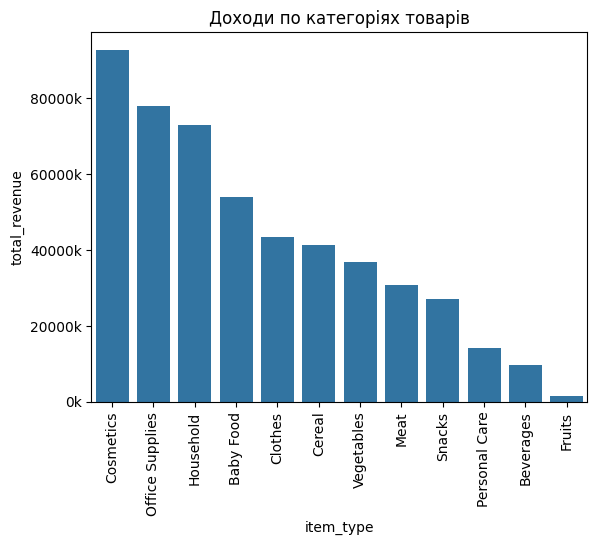

In [ ]:
import matplotlib.ticker as mticker
#Рахуємо показники по категоріях товарів
category_summary = joined_tables.groupby("item_type").agg(
    total_revenue=("revenue", "sum"),
    total_cost=("cost", "sum"),
    total_profit=("profit", "sum"),
    total_units=("units_sold", "sum")
).reset_index()
category_summary = category_summary.sort_values("total_revenue", ascending=False)
#малюємо графік, де видно, яка категорія принесла найбільше грошей.
sns.barplot(data=category_summary, x="item_type", y="total_revenue")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.title("Доходи по категоріях товарів")
plt.show()

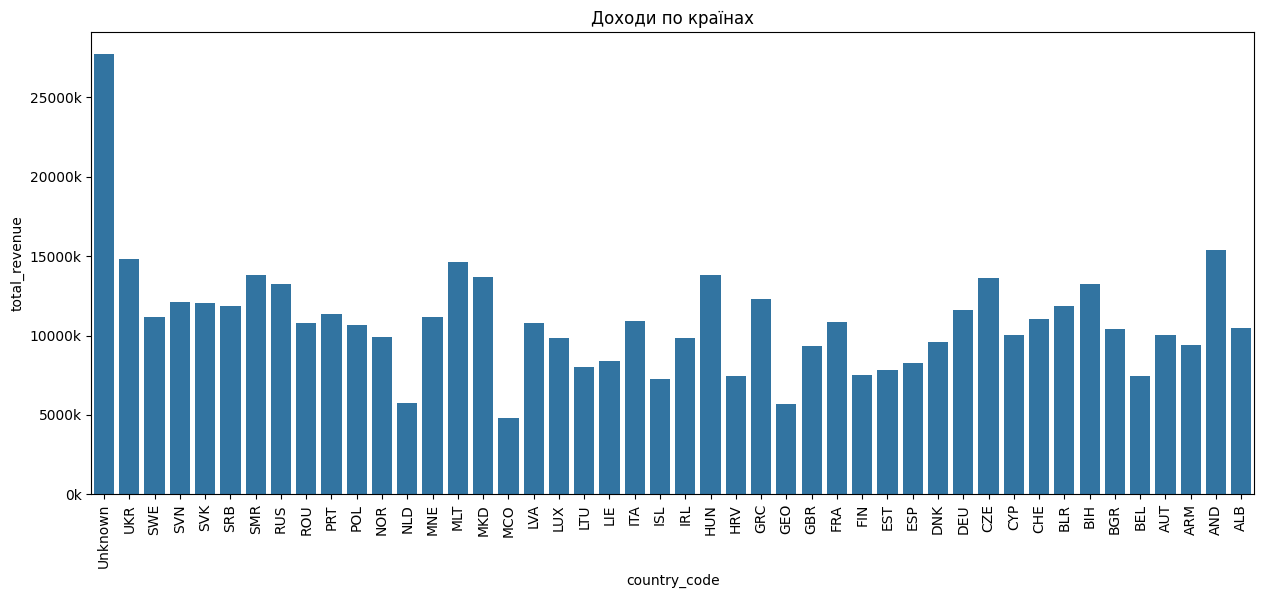

In [ ]:
#рахуємо показники по країнах
country_summary = joined_tables.groupby("country_code").agg(
    total_revenue=("revenue", "sum"),
    total_profit=("profit", "sum"),
    total_units=("units_sold", "sum")
).reset_index()

country_summary = country_summary.sort_values("country_code", ascending=False)
#змінимо ширину графіка
plt.figure(figsize=(15, 6))

sns.barplot(data=country_summary, x="country_code", y="total_revenue")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.title("Доходи по країнах")
plt.show()

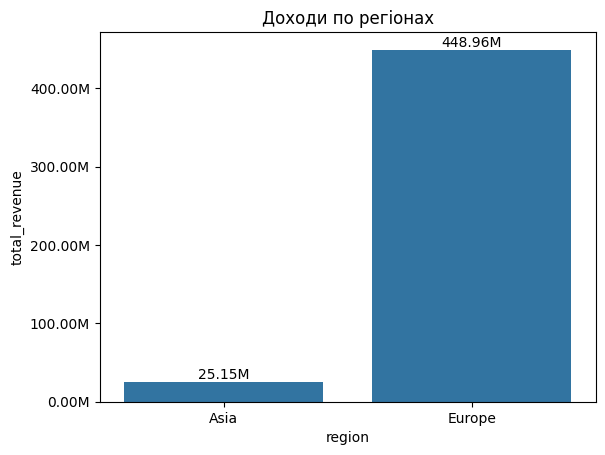

In [ ]:
#рахуємо показники по регіонах
sns.barplot(data=region_summary, x="region", y="total_revenue")
plt.xticks(rotation=0)

#Додаємо числа над стовпчиками у форматі M
for index, row in region_summary.iterrows():
    plt.text(
        x=index,
        y=row['total_revenue'],
        s=f"{row['total_revenue']/1_000_000:.2f}M",  # форматування
        ha='center',
        va='bottom'
    )
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M')
)
plt.title("Доходи по регіонах")
plt.show()

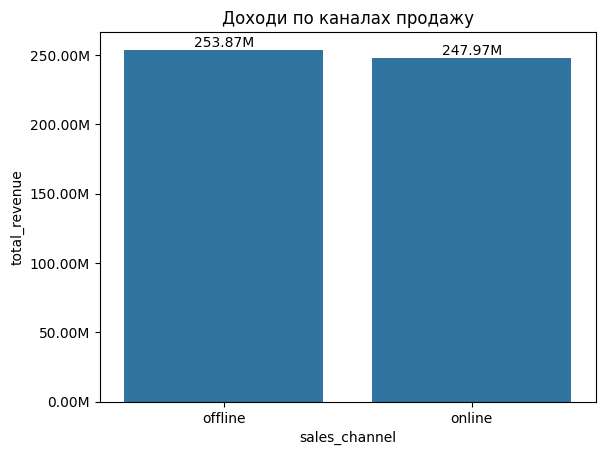

In [ ]:
#рахуєио показники по каналах продажу
channel_summary = joined_tables.groupby("sales_channel").agg(
    total_revenue=("revenue", "sum"),
    total_profit=("profit", "sum"),
    total_units=("units_sold", "sum")
).reset_index()

sns.barplot(data=channel_summary, x="sales_channel", y="total_revenue")
plt.xticks(rotation=0)

for index, row in channel_summary.iterrows():
    plt.text(x=index, y=row['total_revenue'], s=f"{row['total_revenue']/1_000_000:.2f}M", ha='center', va='bottom')
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M')
)
plt.title("Доходи по каналах продажу")
plt.show()

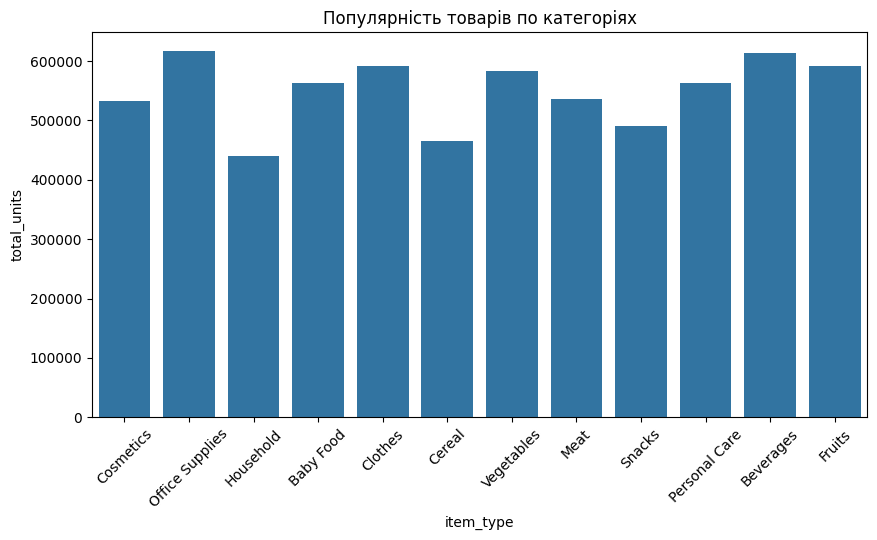

In [ ]:
# Популярність товарів
plt.figure(figsize=(10,5))
sns.barplot(data=category_summary, x="item_type", y="total_units")
plt.xticks(rotation=45)
plt.title("Популярність товарів по категоріях")
plt.show()

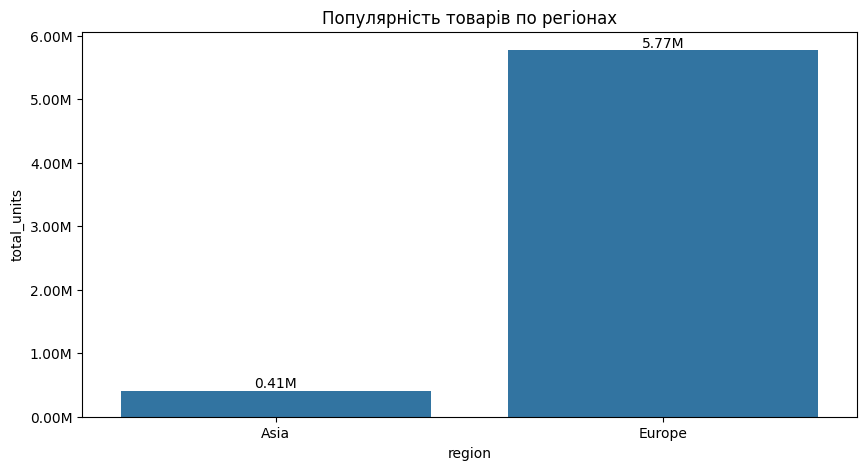

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=region_summary, x="region", y="total_units")
plt.xticks(rotation=0)
plt.title("Популярність товарів по регіонах")

# Додаємо цифри над стовпчиками
for index, row in region_summary.iterrows():
    plt.text(x=index, y=row['total_units'], s=f"{row['total_units']/1_000_000:.2f}M", ha='center', va='bottom')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M'))

plt.show()

**Проаналізуймо інтервали часу між замовленням та його відвантаженням та зробимо відповідні візуалізації в розрізі:**

категорій товарів;
країн;
регіонів.

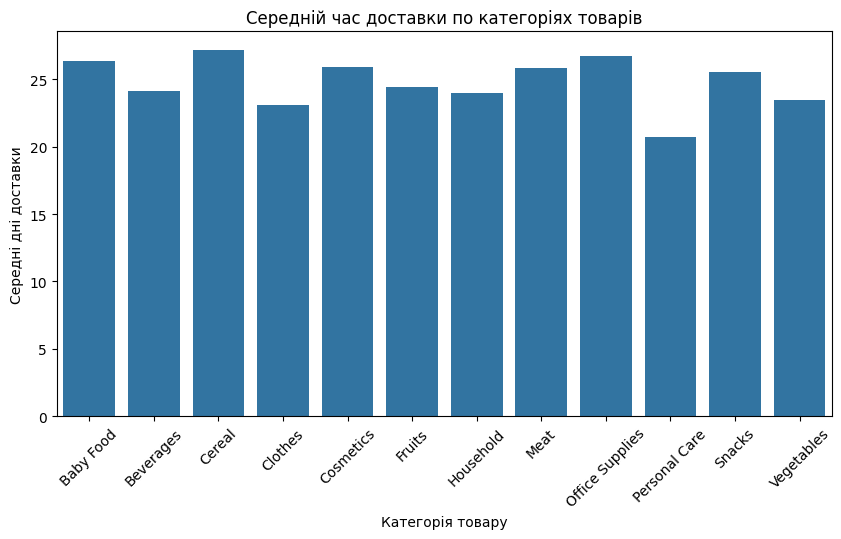

In [ ]:
#Агрегування та графіки по категоріях товарів
category_shipping = joined_tables.groupby("item_type")["shipping_days"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=category_shipping, x="item_type", y="shipping_days")
plt.xticks(rotation=45)
plt.title("Середній час доставки по категоріях товарів")
plt.xlabel("Категорія товару")
plt.ylabel("Середні дні доставки")
plt.show()

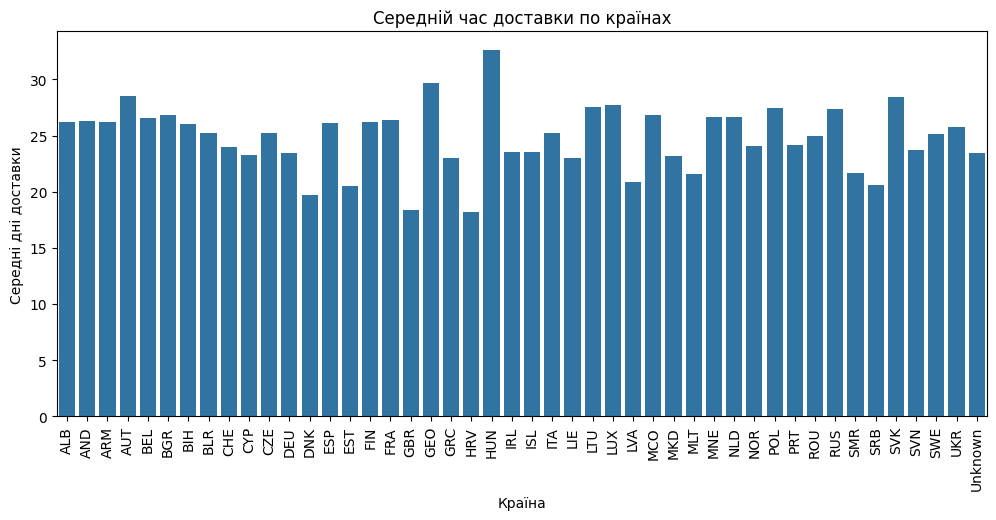

In [ ]:
#по країнах
country_shipping = joined_tables.groupby("country_code")["shipping_days"].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=country_shipping, x="country_code", y="shipping_days")
plt.xticks(rotation=90)
plt.title("Середній час доставки по країнах")
plt.xlabel("Країна")
plt.ylabel("Середні дні доставки")
plt.show()

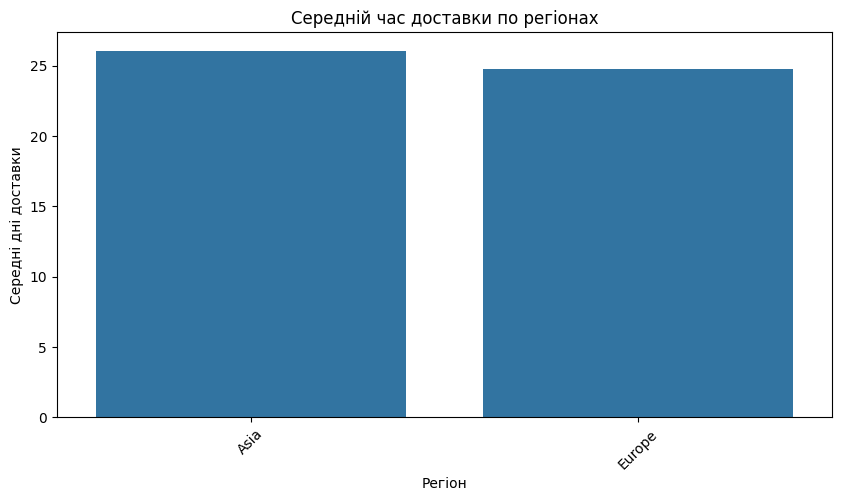

In [ ]:
#регіони

region_shipping = joined_tables.groupby("region")["shipping_days"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=region_shipping, x="region", y="shipping_days")
plt.xticks(rotation=45)
plt.title("Середній час доставки по регіонах")
plt.ylabel("Середні дні доставки")
plt.xlabel("Регіон")
plt.show()

**Проаналізуймо, чи залежить прибуток від часу, необхідного на відвантаження товару.**   
Зробимо потрібні для цього агрегування та візуалізації.

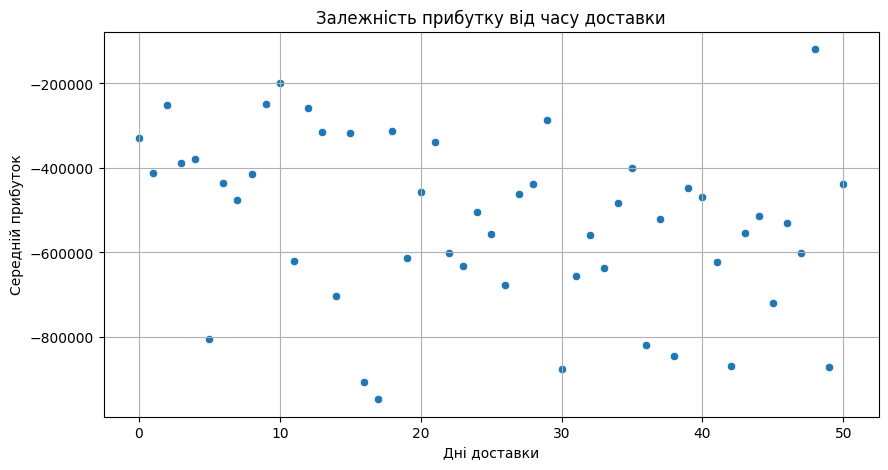

In [ ]:
profit_vs_shipping = joined_tables.groupby("shipping_days")["profit"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.scatterplot(data=profit_vs_shipping, x="shipping_days", y="profit")

plt.xlabel("Дні доставки")
plt.ylabel("Середній прибуток")
plt.title("Залежність прибутку від часу доставки")
plt.grid(True)
plt.show()

###Тепер ми переходимо до аналізу динаміки продажів у часі.
Ідея — подивитися, як змінювалися доходи, прибуток і популярність товарів з часом, і зробити це для   
категорій товарів,   
країн    
регіонів

In [ ]:
#Підготовка дати
joined_tables["order_day"] = joined_tables["order_date"].dt.date
joined_tables["order_month"] = joined_tables["order_date"].dt.to_period("M")

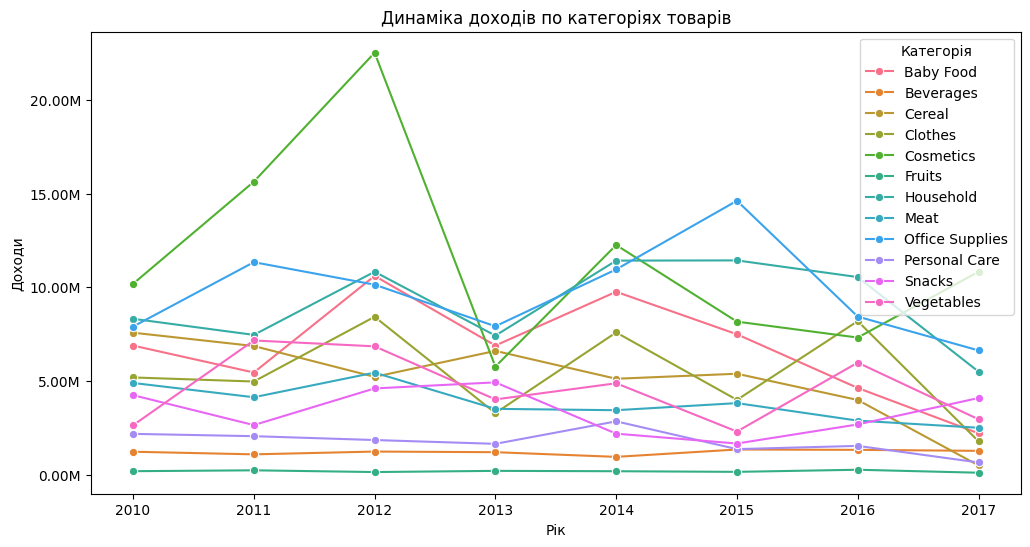

In [ ]:
#Створюємо новий стовпець для року
joined_tables['order_year'] = joined_tables['order_date'].dt.year

#Групуємо по роках та категоріях
category_time = joined_tables.groupby(["order_year", "item_type"]).agg(
    total_revenue=("revenue", "sum"),
    total_profit=("profit", "sum"),
    total_units=("units_sold", "sum")
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=category_time, x="order_year", y="total_revenue", hue="item_type", marker="o")
plt.xticks(rotation=0)
plt.xlabel("Рік")
plt.ylabel("Доходи")

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M'))
plt.title("Динаміка доходів по категоріях товарів")
plt.legend(title="Категорія")
plt.show()

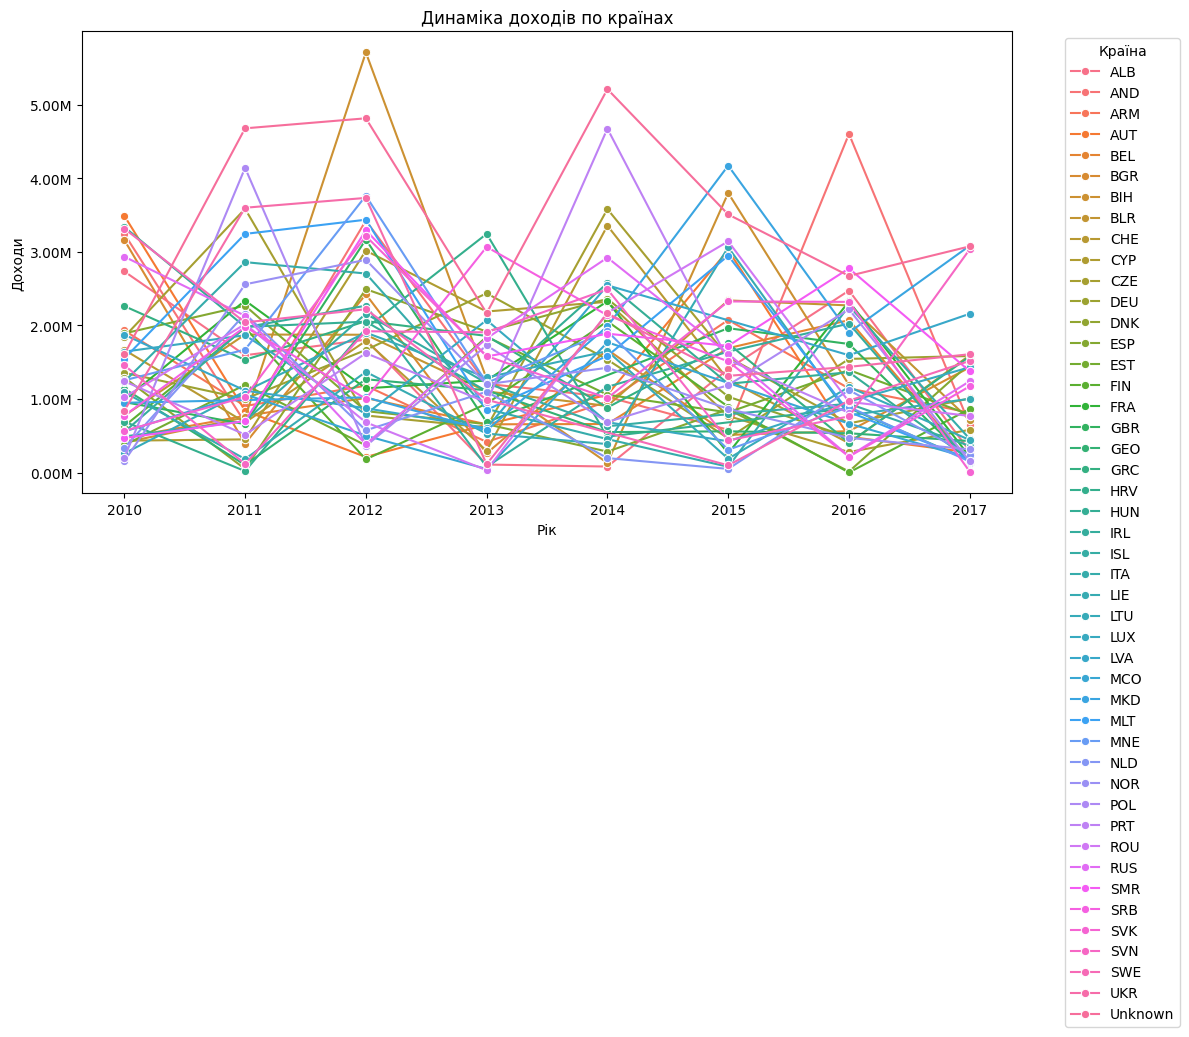

In [ ]:
#по країнах
country_time = joined_tables.groupby(["order_year", "country_code"]).agg(
    total_revenue=("revenue", "sum"),
    total_profit=("profit", "sum"),
    total_units=("units_sold", "sum")
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=country_time, x="order_year", y="total_revenue", hue="country_code", marker="o")
plt.xticks(rotation=0)
plt.xlabel("Рік")
plt.ylabel("Доходи")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M'))
plt.title("Динаміка доходів по країнах")
plt.legend(title="Країна", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


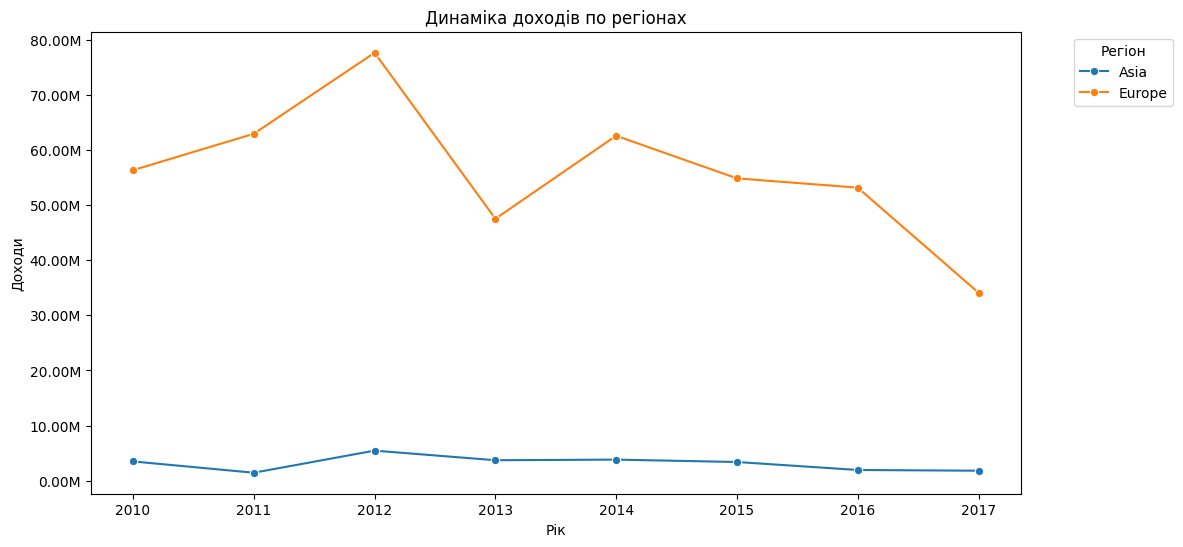

In [ ]:
#по регіонах
region_time = joined_tables.groupby(["order_year", "region"]).agg(
    total_revenue=("revenue", "sum"),
    total_profit=("profit", "sum"),
    total_units=("units_sold", "sum")
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=region_time, x="order_year", y="total_revenue", hue="region", marker="o")
plt.xticks(rotation=0)
plt.xlabel("Рік")
plt.ylabel("Доходи")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M'))
plt.title("Динаміка доходів по регіонах")
plt.legend(title="Регіон", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Проведемо аналіз продажів товарів за днями тижня.   
Визначимо чи можна деякі товари вважати сезонними?

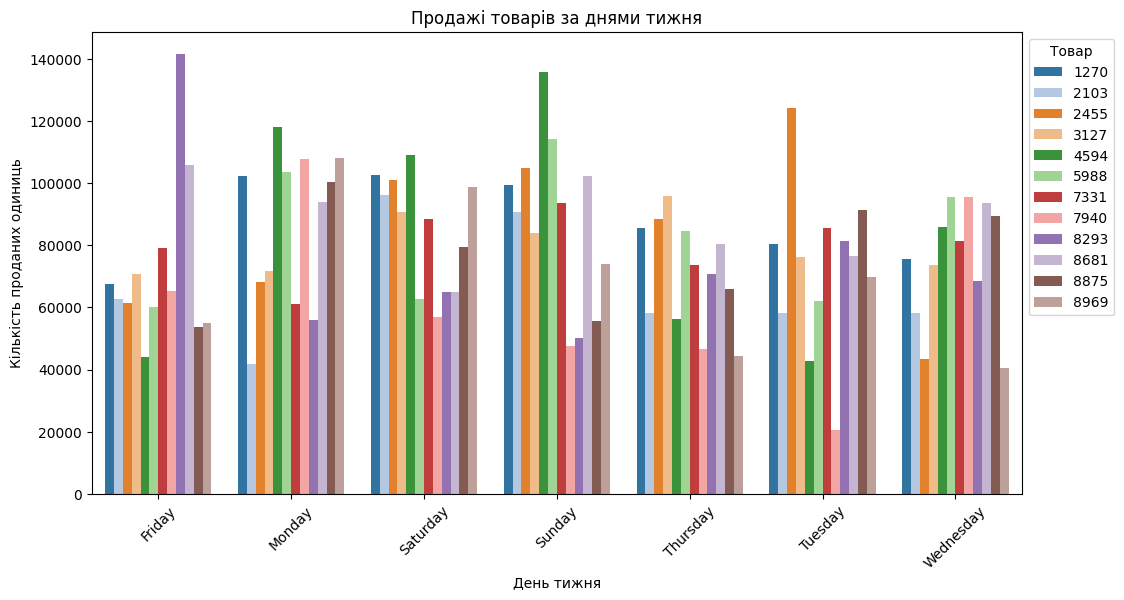

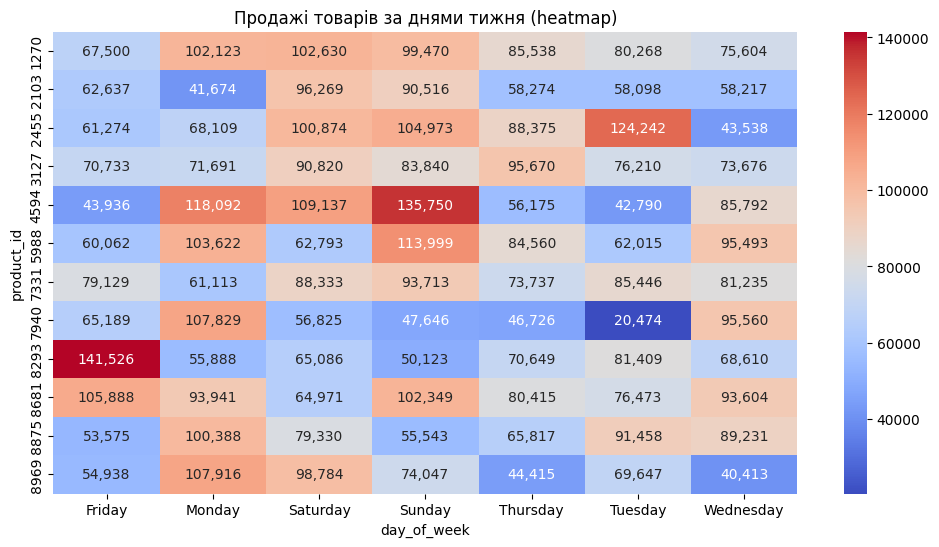

In [ ]:
#Агрегуємо продажі за товарами та днями тижня
product_day = joined_tables.groupby(["product_id", "day_of_week"]).agg(
    total_revenue=("revenue", "sum"),
    total_units=("units_sold", "sum"),
    total_profit=("profit", "sum")
).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=product_day,
    x="day_of_week",
    y="total_units",
    hue="product_id",
    palette="tab20"
)
plt.xticks(rotation=45)
plt.xlabel("День тижня")
plt.ylabel("Кількість проданих одиниць")
plt.title("Продажі товарів за днями тижня")
plt.legend(title="Товар", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

product_pivot = product_day.pivot(index="product_id", columns="day_of_week", values="total_units")

plt.figure(figsize=(12,6))
sns.heatmap(
    product_pivot,
    annot=True,
    fmt=",.0f",
    cmap="coolwarm"
)
plt.title("Продажі товарів за днями тижня (heatmap)")
plt.show()


# Аналіз даних продажів

## 1. Доходи за категоріями товарів
- Лідер за доходами — **“Cosmetics”**, що свідчить про високий попит або високу вартість продуктів.  
- Найбільший дохід з категорії **“Unknown”**, що показує проблему в зборі даних і потребує виправлення для точного аналізу. Однак я не знайшов як саме можу замінити ці дані маючи на руках дані таблиці.  
- Категія **“Vegetables”** має разові піки доходу, можливо через сезонні або великі транзакції.

## 2. Доходи за регіонами та країнами
- **Європа** приносить значно більше доходу, ніж Азія, що вказує на концентрацію бізнес-зусиль на європейському ринку або потребу розробки стратегії для азійського ринку.  
- Середній час доставки сильно відрізняється між країнами, що свідчить про логістичні проблеми у деяких регіонах.

## 3. Канали продажів
- Доходи від **offline** та **online** майже однакові.  
- Це говорить про ефективність обох каналів і необхідність підтримувати збалансовану омніканальну стратегію.

## 4. Логістика та час доставки
- Найдовший час доставки спостерігається у категоріях **“Cereal”** та **“Meat”**, а найшвидший — у **“Office Supplies”**.  
- Існує негативна залежність між часом доставки і прибутком: чим довше доставляється товар, тим більші втрати або менший прибуток.  
- Це підкреслює важливість оптимізації логістики для максимізації прибутку.

## 5. Продажі за днями тижня
- Продажі рівномірно розподілені протягом тижня, з невеликими піками в окремі дні.  
- Це свідчить про стабільний попит і дозволяє ефективно планувати логістику та управління запасами.
